In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('insurance.csv')
data.drop_duplicates(inplace=True)
data.dropna(inplace = True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
indexColArray = np.array(list(range(0, len(data))))

#2. Assign the above array to data
data.set_index(indexColArray, inplace=True)

data.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [4]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [6]:
data[data.age < 0]

,age,sex,bmi,children,smoker,region,charges


In [7]:
data[data.bmi < 0]

,age,sex,bmi,children,smoker,region,charges


In [8]:
data[data.charges < 0]

,age,sex,bmi,children,smoker,region,charges


In [9]:
data.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [10]:
data.sex.unique()


array(['female', 'male'], dtype=object)

In [11]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [12]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
data_dummy=pd.get_dummies(data.region)
x1=data.drop('region',axis=1)
x1


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1332,50,male,30.970,3,no,10600.54830
1333,18,female,31.920,0,no,2205.98080
1334,18,female,36.850,0,no,1629.83350
1335,21,female,25.800,0,no,2007.94500


In [11]:
x2=pd.get_dummies(data.sex)

In [12]:
x3=pd.get_dummies(data.smoker)

In [13]:
x=pd.concat([x2,x3,x1],axis=1)
x.drop(['smoker','sex'],axis=1,inplace=True)
x

,female,male,no,yes,age,bmi,children,charges
0,1,0,0,1,19,27.900,0,16884.92400
1,0,1,1,0,18,33.770,1,1725.55230
2,0,1,1,0,28,33.000,3,4449.46200
3,0,1,1,0,33,22.705,0,21984.47061
4,0,1,1,0,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...,...
1332,0,1,1,0,50,30.970,3,10600.54830
1333,1,0,1,0,18,31.920,0,2205.98080
1334,1,0,1,0,18,36.850,0,1629.83350
1335,1,0,1,0,21,25.800,0,2007.94500


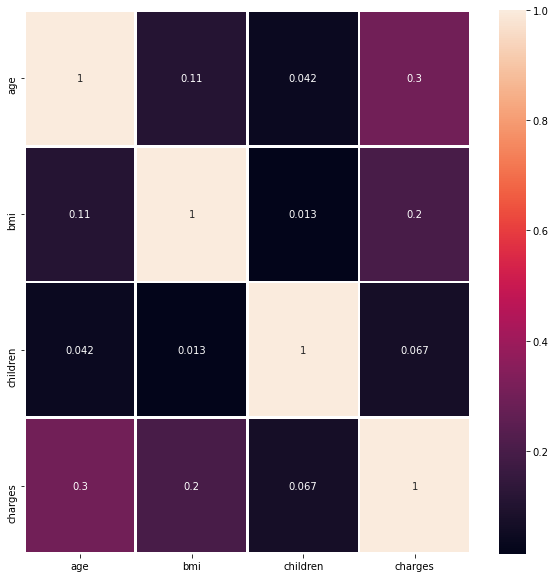

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=2)
plt.show()

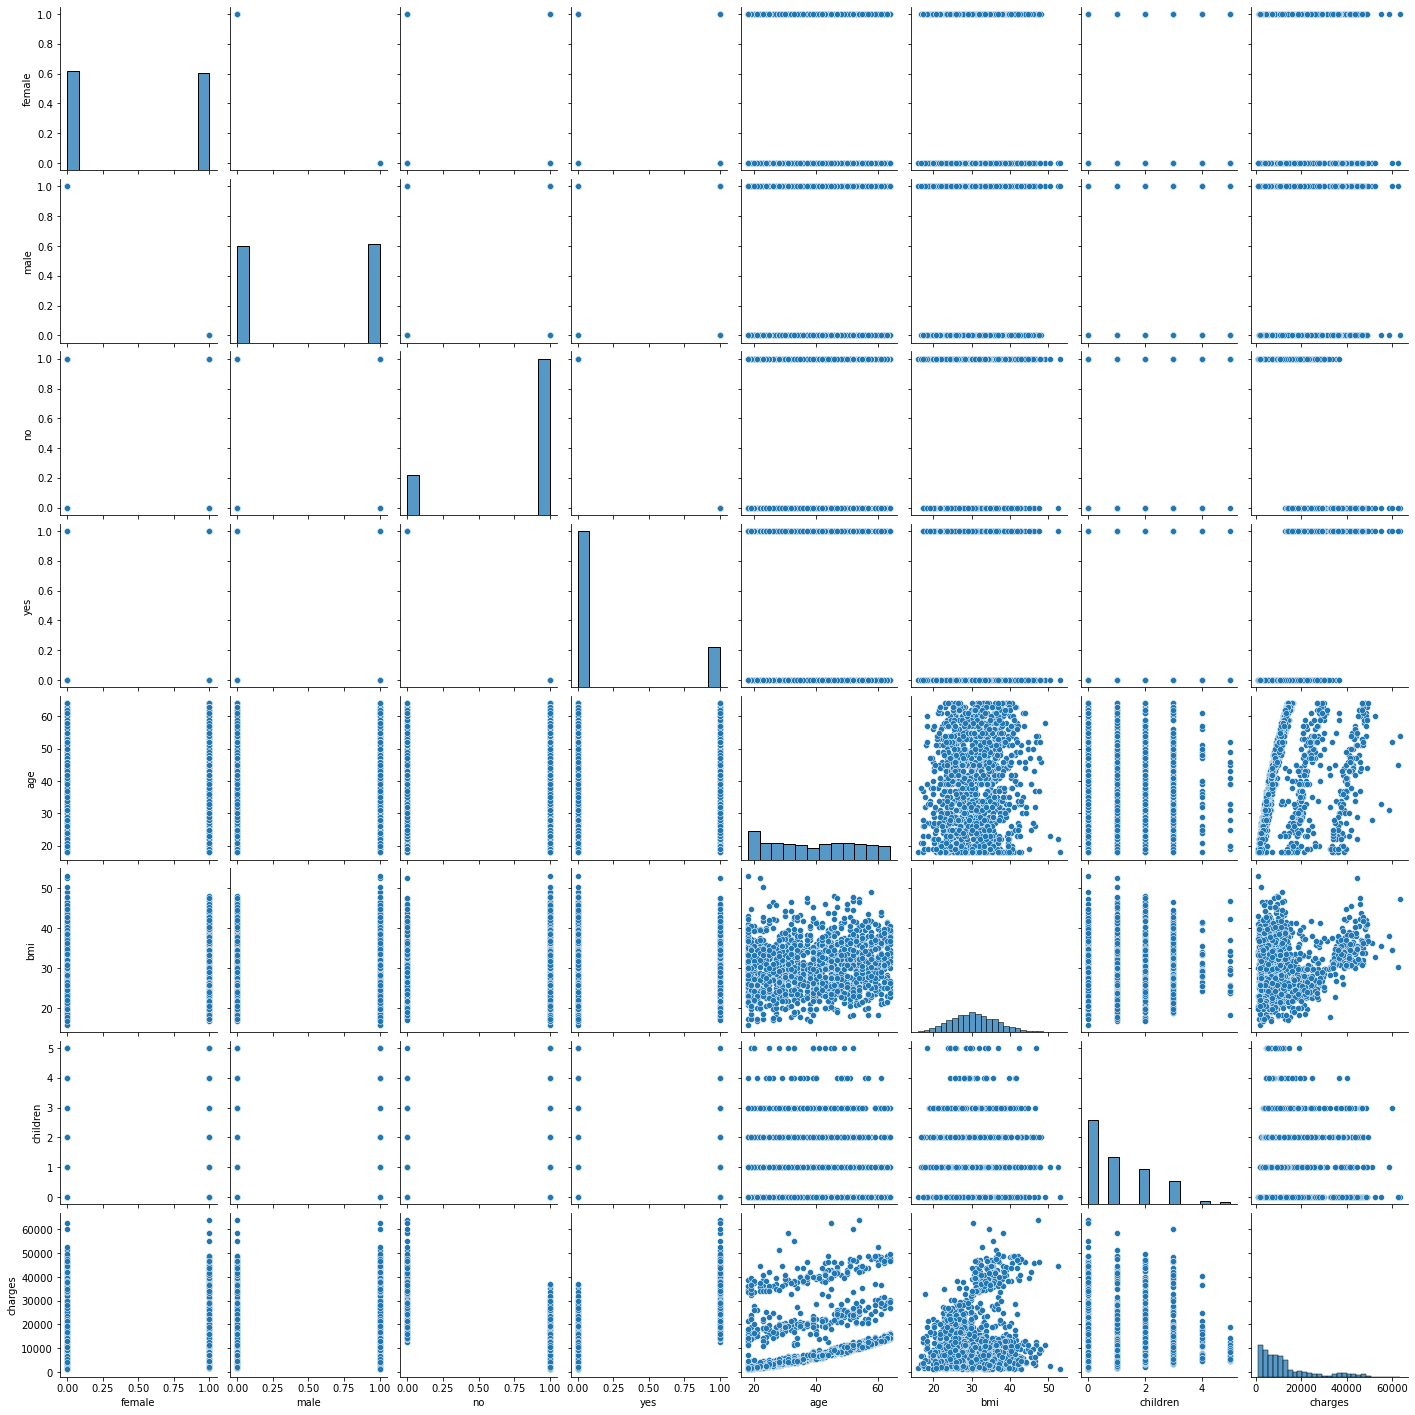

In [22]:
sns.pairplot(x)

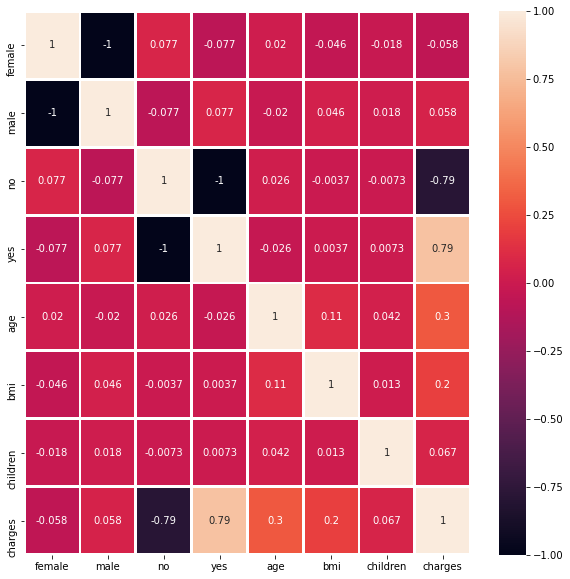

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(x.corr(), annot=True, linewidth=2)
plt.show()

In [ ]:
#THERE IS STRONG CO_RELATION BETWEEN THE INDEPENDENT AND DEPENDENT VARIBLES SMOKER,AGE,BMI AND CAHRGES

In [14]:
x

,female,male,no,yes,age,bmi,children,charges
0,1,0,0,1,19,27.900,0,16884.92400
1,0,1,1,0,18,33.770,1,1725.55230
2,0,1,1,0,28,33.000,3,4449.46200
3,0,1,1,0,33,22.705,0,21984.47061
4,0,1,1,0,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...,...
1332,0,1,1,0,50,30.970,3,10600.54830
1333,1,0,1,0,18,31.920,0,2205.98080
1334,1,0,1,0,18,36.850,0,1629.83350
1335,1,0,1,0,21,25.800,0,2007.94500


In [19]:
X_feature=x.drop('charges',axis=1)
X_Label=x['charges']


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X_feature,X_Label,test_size=0.2)

In [22]:
from sklearn import linear_model
model=linear_model.LinearRegression()

In [23]:
reg=model.fit(X_train,y_train)

In [24]:
y_pred=reg.predict(X_test)
y_pred

array([ 1.30092444e+04,  1.50382880e+04,  1.09577994e+04,  9.98863408e+03,
        2.71047340e+04,  3.74231528e+04,  3.15008904e+04,  1.73335589e+04,
        1.14454237e+04,  5.97243058e+03,  1.59462569e+04,  1.38422097e+04,
        9.68829093e+03,  6.63316700e+03,  1.03453016e+04,  1.21519291e+04,
        7.73182586e+03,  1.17348154e+04,  3.90086836e+04,  1.38145188e+04,
        3.08513481e+04,  1.26518411e+04,  8.33119625e+03,  1.12738406e+04,
        1.11410283e+04,  8.66899790e+03,  1.66210423e+03,  1.00950337e+04,
        6.29118405e+03,  8.28721882e+03,  3.31119114e+04,  1.87784676e+04,
        5.90455967e+03,  3.33399125e+04,  2.46034168e+03,  5.84621152e+03,
        1.01808280e+04,  2.41280561e+04,  1.18103545e+04,  1.47942976e+04,
        1.23388016e+04,  2.79909554e+03,  1.59916653e+03,  3.77925319e+04,
        6.91328200e+03,  4.32399002e+03,  1.82110872e+03,  4.78106953e+03,
        1.53836140e+04,  2.53520998e+04,  4.38416166e+03,  1.30814141e+04,
        1.11995575e+04,  

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(y_test,y_pred)

0.7312527901489527

In [55]:
#when we take all features our accuracy score is 73%

In [56]:
X_feature_imp=x.drop(['charges','female','male','children'],axis=1)
X_Label_imp=x['charges']

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_feature_imp,X_Label_imp,test_size=0.2)

In [65]:
from sklearn import linear_model
model=linear_model.LinearRegression()

In [66]:
reg=model.fit(X_train,y_train)

In [67]:
y_pred=reg.predict(X_test)
y_pred

array([-4.54938877e+02,  3.52328664e+04,  2.98103818e+04,  1.56814951e+03,
        3.87323034e+04,  4.04057110e+04,  3.36318243e+03,  4.02333903e+03,
        7.38839956e+03,  4.52965211e+03,  1.30301528e+04,  1.42294471e+04,
        3.09853584e+04,  7.82991101e+02,  3.58903085e+04,  1.22601801e+04,
        1.25435867e+04,  2.51111572e+03,  2.97072909e+04,  1.13701212e+04,
        4.41165545e+03,  4.20336559e+03,  1.14841629e+04,  3.30144174e+03,
        1.05347792e+04,  2.78736223e+04,  5.65173077e+03,  6.14192541e+03,
        3.28022930e+04,  2.88828905e+04,  2.76016803e+03,  1.05156385e+04,
        3.18793816e+04,  5.18861469e+03,  3.71104421e+03,  2.41685825e+03,
        8.70569050e+03,  9.42517184e+03,  1.49203387e+04,  8.29883040e+03,
        3.40151033e+03,  1.44727347e+04,  5.09797650e+03,  2.99065805e+03,
        1.09781483e+04,  1.57146197e+04,  9.53222697e+03,  9.84910020e+02,
        7.14383247e+01,  1.66995424e+04,  1.18937653e+04,  2.89054077e+04,
        1.69458709e+04,  

In [68]:
from sklearn.metrics import r2_score


In [69]:
r2_score(y_test,y_pred)

0.771756728558368

In [ ]:
#so accuracy of imp features is 77% 